In [75]:
import numpy as np
import sys
import os
import glob
import getpass
import argparse
import pickle
import matplotlib.cm as cm
import matplotlib.pyplot as plt

In [149]:
user=getpass.getuser()
print(user)
if user=='eghbalhosseini':
    save_dir='/Users/eghbalhosseini/MyData/neural_manifolds/network_training_on_synthetic/'
    data_dir='/Users/eghbalhosseini/MyData/neural_manifolds/synthetic_datasets/'
    analyze_dir='/Users/eghbalhosseini/MyData/neural_manifolds/analysis/'
elif user=='ehoseini':
    save_dir='/om/user/ehoseini/MyData/neural_manifolds/network_training_on_synthetic/'
    data_dir='/om/user/ehoseini/MyData/neural_manifolds/synthetic_datasets/'
train_dir='train_VGG16_synthdata_tree_nclass_50_n_exm_1000'

if not os.path.exists(os.path.join(analyze_dir,train_dir)):
        os.makedirs(os.path.join(analyze_dir,train_dir))

eghbalhosseini


In [8]:
EPOCH_FILES='mftma_epoch_*'
epoch_files=glob.glob(os.path.join(save_dir,train_dir,EPOCH_FILES))
print('num_files: '+str(len(epoch_files)))

num_files: 255


In [100]:
cap_groups=[]
radii_groups=[]
dims_groups=[]
corr_groups=[]
epochs=[]
layer_num=[]
train_accuray=[]
layer_name=[]
hierarchies=[]
n_classes=[]
for idx ,x in (enumerate(epoch_files)):
    data=pickle.load(open(x,'rb'))
    cap_groups.append([data['mftma_results'][0]['capacities'],data['mftma_results'][1]['capacities']])
    radii_groups.append([data['mftma_results'][0]['radii'],data['mftma_results'][1]['radii']])
    dims_groups.append([data['mftma_results'][0]['dimensions'],data['mftma_results'][1]['dimensions']])
    corr_groups.append([data['mftma_results'][0]['correlations'],data['mftma_results'][1]['correlations']])
    layer_name.append([data['mftma_results'][0]['layer'],data['mftma_results'][1]['layer']])
    hierarchies.append([data['mftma_results'][0]['hierarchy'],data['mftma_results'][1]['hierarchy']])
    n_classes.append([data['mftma_results'][0]['n_hier_class'],data['mftma_results'][1]['n_hier_class']])
    epochs.append(data['epoch'])
    layer_num.append(data['layer_num'])
    train_accuray.append(data['train_accuracy'])

In [114]:
h0=cm.get_cmap('viridis_r',len(np.unique(epochs)))
h0_c=np.flipud(h0(np.arange(len(np.unique(epochs)))/len(np.unique(epochs))))
h1=cm.get_cmap('plasma_r',len(np.unique(epochs)))
h1_c=np.flipud(h1(np.arange(len(np.unique(epochs)))/len(np.unique(epochs))))

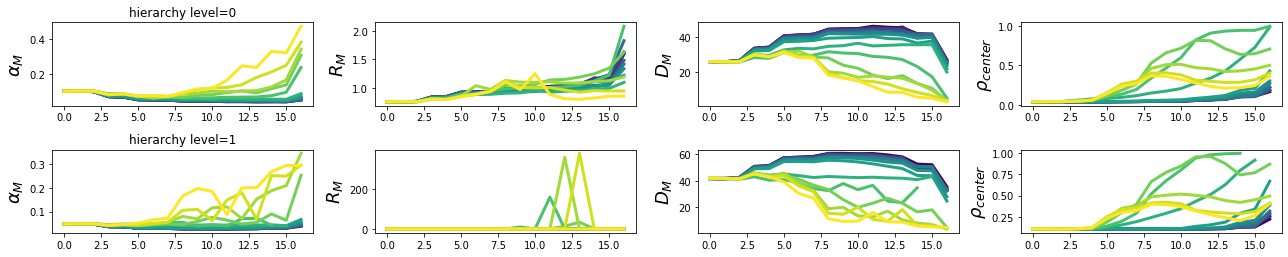

In [151]:

fig, axes = plt.subplots(2, 4, figsize=(18, 4))
ax=axes.flatten()
for k in np.unique(epochs):
    k_idx=np.argwhere(np.stack(epochs)==k)
    lay_of_ep=[layer_num[int(x)] for x in k_idx]
    cap_of_ep=[cap_groups[int(x)] for x in k_idx]
    rad_of_ep=[radii_groups[int(x)] for x in k_idx]
    dim_of_ep=[dims_groups[int(x)] for x in k_idx]
    cor_of_ep=[corr_groups[int(x)] for x in k_idx]
    accu_of_ep=[train_accuray[int(x)] for x in k_idx]
    # sort them 
    lay_idx=np.argsort(lay_of_ep)    
    cap_epoch=[cap_of_ep[int(x)] for x in lay_idx]
    rad_epoch=[rad_of_ep[int(x)] for x in lay_idx]
    dim_epoch=[dim_of_ep[int(x)] for x in lay_idx]
    corr_epoch=[cor_of_ep[int(x)] for x in lay_idx]
    ax[0].plot(np.squeeze(cap_epoch)[:,0], linewidth=3,c=h0_c[k-1,:],label=str(k))
    ax[0].set_title('hierarchy level=0')
    ax[1].plot(np.squeeze(rad_epoch)[:,0], linewidth=3,c=h0_c[k-1,:],label=str(k))
    ax[2].plot(np.squeeze(dim_epoch)[:,0], linewidth=3,c=h0_c[k-1,:],label=str(k))
    ax[3].plot(np.squeeze(corr_epoch)[:,0], linewidth=3,c=h0_c[k-1,:],label=str(k))
    ax[0].set_ylabel(r'$\alpha_M$', fontsize=18)
    ax[1].set_ylabel(r'$R_M$', fontsize=18)
    ax[2].set_ylabel(r'$D_M$', fontsize=18)
    ax[3].set_ylabel(r'$\rho_{center}$', fontsize=18)
    # second hierarchy 
    ax[4].set_title('hierarchy level=1')
    ax[4].plot(np.squeeze(cap_epoch)[:,1], linewidth=3,c=h0_c[k-1,:],label=str(k))
    ax[5].plot(np.squeeze(rad_epoch)[:,1], linewidth=3,c=h0_c[k-1,:],label=str(k))
    ax[6].plot(np.squeeze(dim_epoch)[:,1], linewidth=3,c=h0_c[k-1,:],label=str(k))
    ax[7].plot(np.squeeze(corr_epoch)[:,1], linewidth=3,c=h0_c[k-1,:],label=str(k))
    ax[4].set_ylabel(r'$\alpha_M$', fontsize=18)
    ax[5].set_ylabel(r'$R_M$', fontsize=18)
    ax[6].set_ylabel(r'$D_M$', fontsize=18)
    ax[7].set_ylabel(r'$\rho_{center}$', fontsize=18)

fig.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()
fig.savefig(os.path.join(analyze_dir,train_dir,'manifold_vals_during_training.png'),transparent=True)

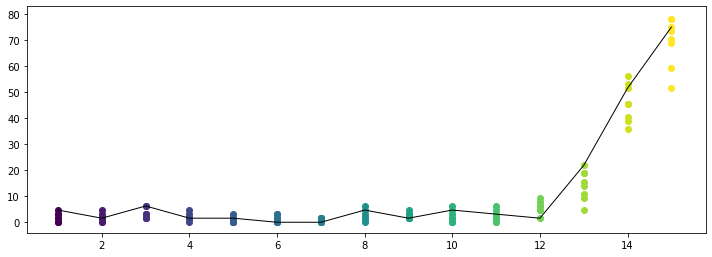

In [152]:
fig, axes = plt.subplots(1,1, figsize=(10, 4))
ax=axes
accuracies=[]
for k in np.unique(epochs):
    k_idx=np.argwhere(np.stack(epochs)==k)
    accu_of_ep=[train_accuray[int(x)] for x in k_idx]
    accuracies.append(accu_of_ep[0][-1])
    # sort them 
    ax.scatter(np.repeat(k,len(accu_of_ep[0])),np.squeeze(accu_of_ep[0]),c=[h0_c[k-1,:]],label=str(k))
ax.plot(np.unique(epochs),np.squeeze(accuracies), linewidth=1,c='k')
fig.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()
fig.savefig(os.path.join(analyze_dir,train_dir,'accuracy_during_training.png'),transparent=True)

In [154]:
np.unique(layer_num)

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16])

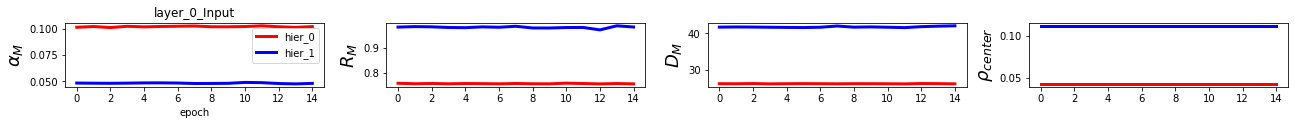

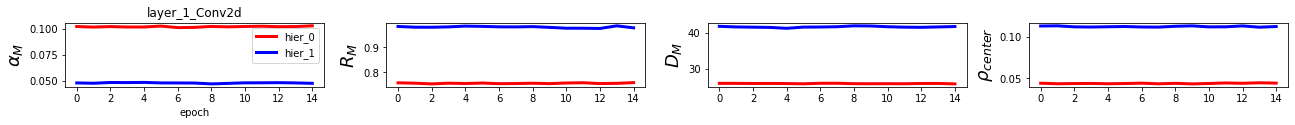

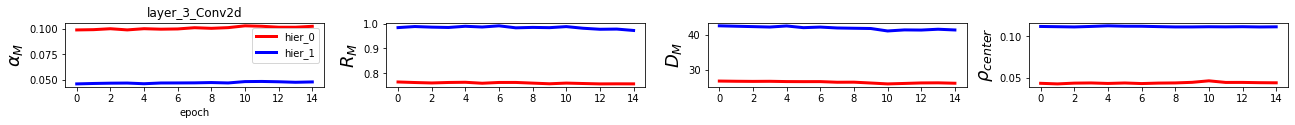

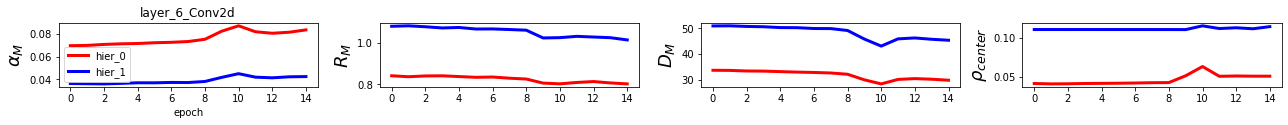

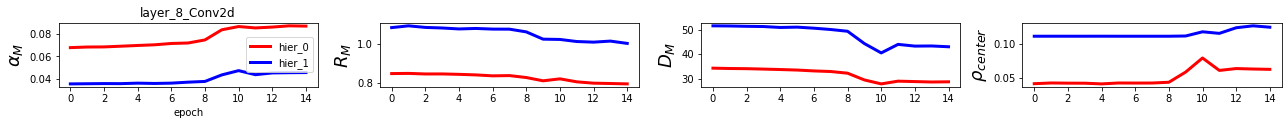

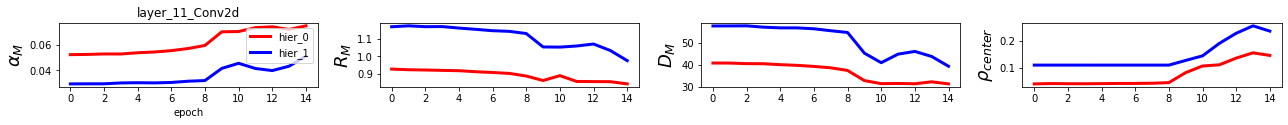

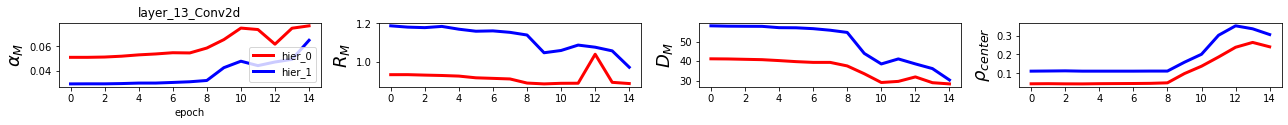

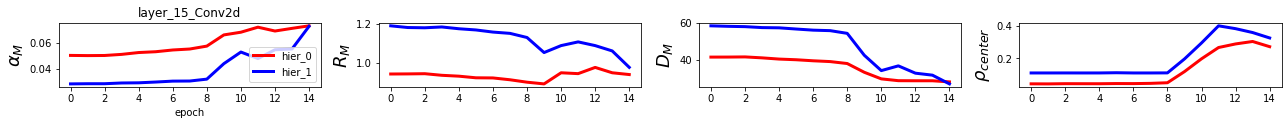

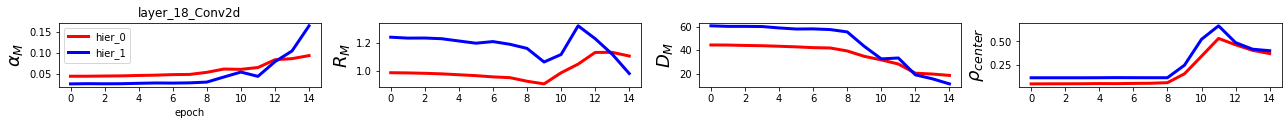

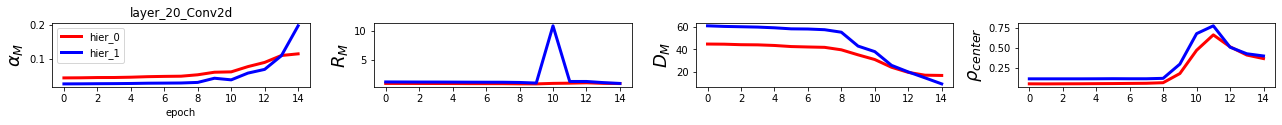

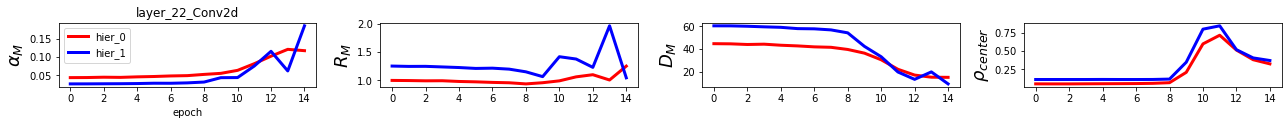

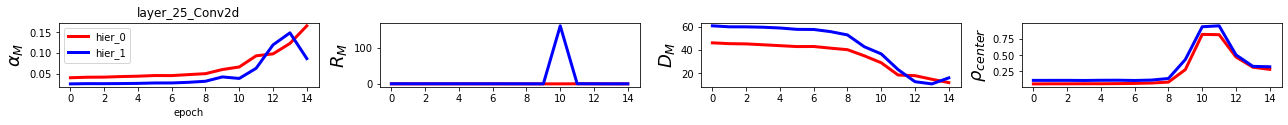

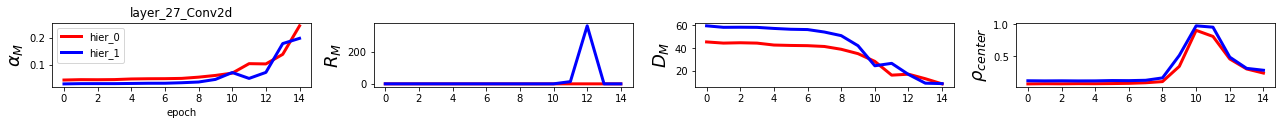

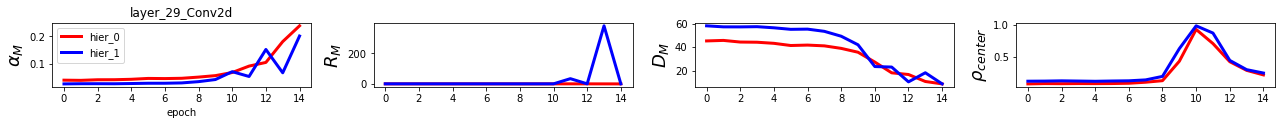

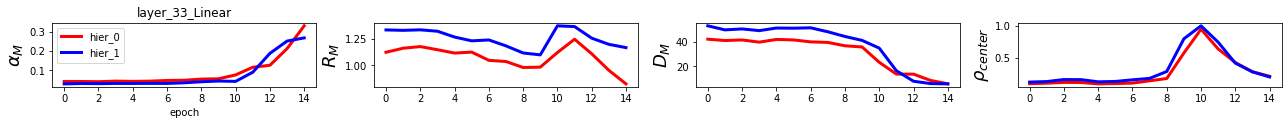

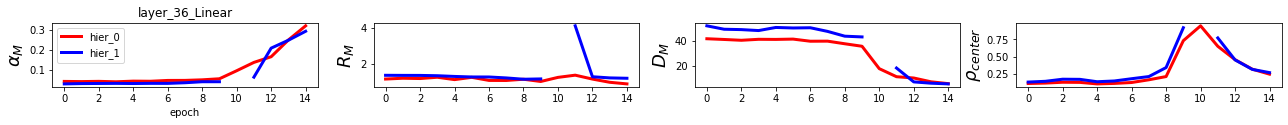

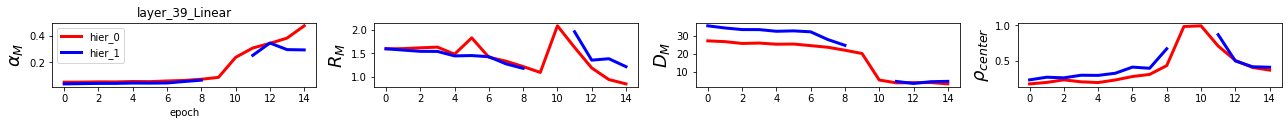

In [187]:
#fig, axes = plt.subplots(2, 4, figsize=(18, 4))
#ax=axes.flatten()
for k in np.unique(layer_num):
    k_idx=np.argwhere(np.stack(layer_num)==k)
    cap_of_layer=[cap_groups[int(x)] for x in k_idx]
    rad_of_layer=[radii_groups[int(x)] for x in k_idx]
    dim_of_layer=[dims_groups[int(x)] for x in k_idx]
    cor_of_layer=[corr_groups[int(x)] for x in k_idx]
    lay=[layer_name[int(x)] for x in k_idx][0][0]
    epoch_of_layer=[epochs[int(x)] for x in k_idx]
    # sort them 
    ep_idx=np.argsort(epoch_of_layer)    
    cap_epoch=[cap_of_layer[int(x)] for x in ep_idx]
    rad_epoch=[rad_of_layer[int(x)] for x in ep_idx]
    dim_epoch=[dim_of_layer[int(x)] for x in ep_idx]
    cor_epoch=[cor_of_layer[int(x)] for x in ep_idx]
    fig, axes = plt.subplots(1, 4, figsize=(18, 2))
    ax=axes.flatten()
    ax[0].plot(np.squeeze(cap_epoch)[:,0], linewidth=3,c='r',label='hier_0')
    ax[0].plot(np.squeeze(cap_epoch)[:,1], linewidth=3,c='b',label='hier_1')
    ax[0].legend()
    ax[0].set_title(lay)
    ax[0].set_xlabel('epoch')
    ax[1].plot(np.squeeze(rad_epoch)[:,0], linewidth=3,c='r',label='hier_0')
    ax[1].plot(np.squeeze(rad_epoch)[:,1], linewidth=3,c='b',label='hier_1')
    ax[2].plot(np.squeeze(dim_epoch)[:,0], linewidth=3,c='r',label='hier_0')
    ax[2].plot(np.squeeze(dim_epoch)[:,1], linewidth=3,c='b',label='hier_1')
    ax[3].plot(np.squeeze(cor_epoch)[:,0], linewidth=3,c='r',label='hier_0')
    ax[3].plot(np.squeeze(cor_epoch)[:,1], linewidth=3,c='b',label='hier_1')
    ax[0].set_ylabel(r'$\alpha_M$', fontsize=18)
    ax[1].set_ylabel(r'$R_M$', fontsize=18)
    ax[2].set_ylabel(r'$D_M$', fontsize=18)
    ax[3].set_ylabel(r'$\rho_{center}$', fontsize=18)
    fig.tight_layout(rect=[0, 0.03, 1, 0.95])
    fig.savefig(os.path.join(analyze_dir,train_dir,lay+'_epoch_change.png'),transparent=True)

In [179]:
[layer_name[int(x)] for x in k_idx][0][0]

'layer_0_Input'